In [20]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, InputLayer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import optimizers


In [3]:
max_features = 1000
maxlen = 500
batch_size = 32

In [4]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [5]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [6]:
model = Sequential([
    InputLayer((500,)),
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [8]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - acc: 0.5505 - loss: 0.6804 - val_acc: 0.7448 - val_loss: 0.5404
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - acc: 0.7423 - loss: 0.5333 - val_acc: 0.7151 - val_loss: 0.5746
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - acc: 0.7827 - loss: 0.4707 - val_acc: 0.8037 - val_loss: 0.4450
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 25s 184ms/step - acc: 0.8100 - loss: 0.4263 - val_acc: 0.7496 - val_loss: 0.5012
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 25s 181ms/step - acc: 0.8343 - loss: 0.3892 - val_acc: 0.8031 - val_loss: 0.4345


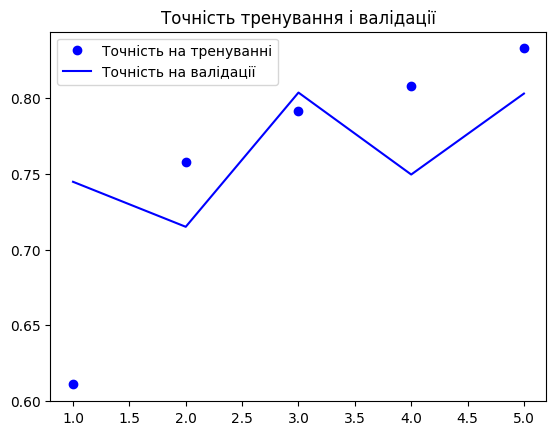

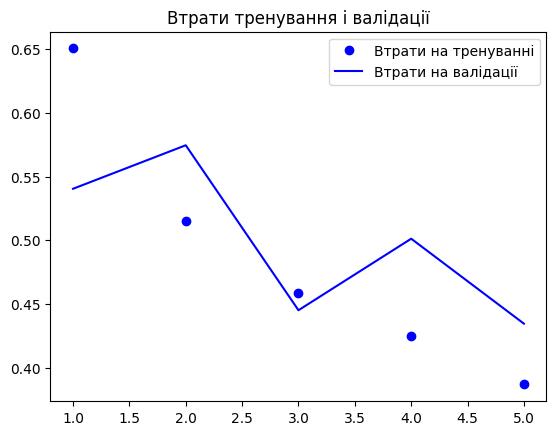

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


In [10]:
model = Sequential([
    InputLayer((500,)),
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [12]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 48s 315ms/step - acc: 0.5690 - loss: 0.6796 - val_acc: 0.7388 - val_loss: 0.5401
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 30s 221ms/step - acc: 0.7374 - loss: 0.5373 - val_acc: 0.7523 - val_loss: 0.5114
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 268ms/step - acc: 0.7844 - loss: 0.4742 - val_acc: 0.6133 - val_loss: 0.7876
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 46s 301ms/step - acc: 0.8026 - loss: 0.4453 - val_acc: 0.8181 - val_loss: 0.4225
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 253ms/step - acc: 0.8222 - loss: 0.4073 - val_acc: 0.8071 - val_loss: 0.4199


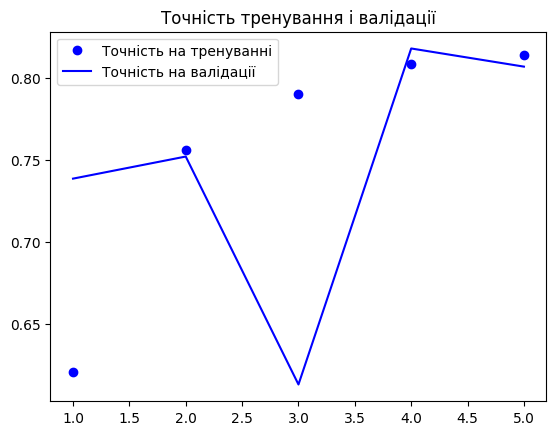

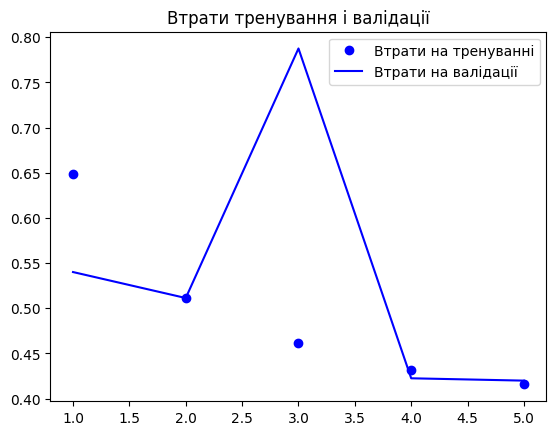

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


In [14]:
model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer=optimizers.RMSprop(0.001), loss='binary_crossentropy', metrics=['acc'])

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.0001)

history = model.fit(input_train, y_train, epochs=5, batch_size=64, callbacks=[early_stop, reduce_lr], validation_data=(input_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 241s 617ms/step - acc: 0.6158 - loss: 0.6308 - val_acc: 0.8041 - val_loss: 0.4370 - learning_rate: 0.0010
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 258s 661ms/step - acc: 0.8065 - loss: 0.4407 - val_acc: 0.8236 - val_loss: 0.3980 - learning_rate: 0.0010
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 241s 616ms/step - acc: 0.8337 - loss: 0.3911 - val_acc: 0.8573 - val_loss: 0.3516 - learning_rate: 0.0010
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 293s 749ms/step - acc: 0.8426 - loss: 0.3650 - val_acc: 0.8486 - val_loss: 0.3519 - learning_rate: 0.0010
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 673ms/step - acc: 0.8598 - loss: 0.3347 - val_acc: 0.8648 - val_loss: 0.3154 - learning_rate: 0.0010


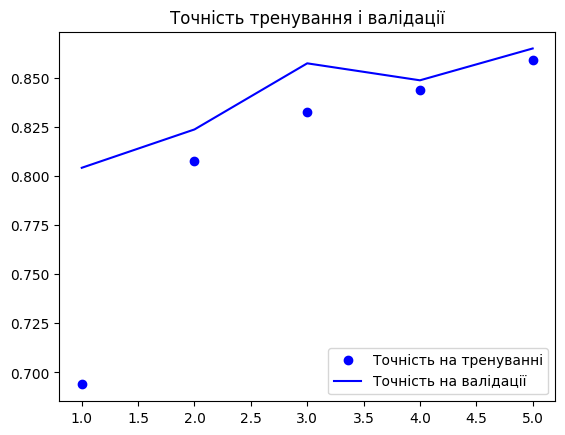

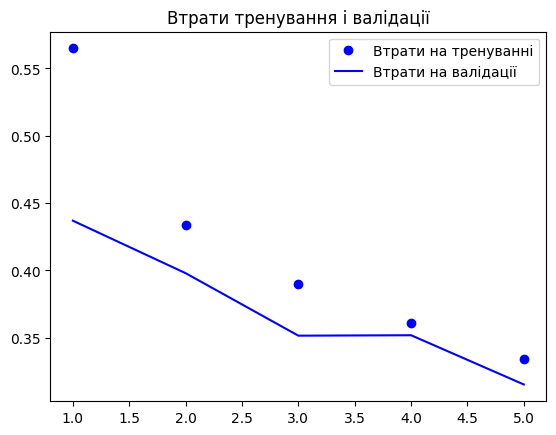

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


In [26]:
model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(SimpleRNN(32, return_sequences=True)),
    Bidirectional(SimpleRNN(32)),
    Dense(1, activation='sigmoid')
])

In [27]:
model.compile(optimizer=optimizers.RMSprop(0.001), loss='binary_crossentropy', metrics=['acc'])

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.0001)

history = model.fit(input_train, y_train, epochs=5, batch_size=64, callbacks=[early_stop, reduce_lr], validation_data=(input_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 363ms/step - acc: 0.6352 - loss: 0.6293 - val_acc: 0.8163 - val_loss: 0.4271 - learning_rate: 0.0010
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 355ms/step - acc: 0.7920 - loss: 0.4545 - val_acc: 0.7894 - val_loss: 0.4537 - learning_rate: 0.0010
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 135s 345ms/step - acc: 0.8173 - loss: 0.4153 - val_acc: 0.8332 - val_loss: 0.3927 - learning_rate: 0.0010
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 162s 416ms/step - acc: 0.8265 - loss: 0.3967 - val_acc: 0.8094 - val_loss: 0.4387 - learning_rate: 0.0010
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 171s 437ms/step - acc: 0.8272 - loss: 0.3941 - val_acc: 0.7274 - val_loss: 0.5247 - learning_rate: 0.0010


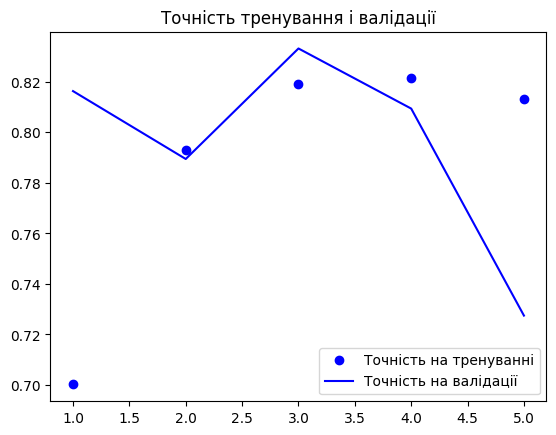

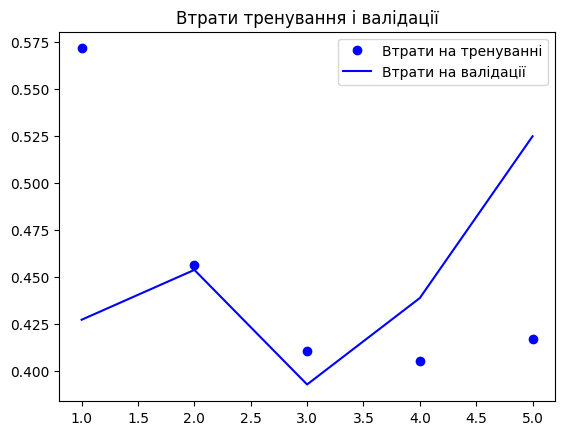

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки
